# Simulating the dynamics of rydberg atoms using pasqal-pulser

### Tutorial

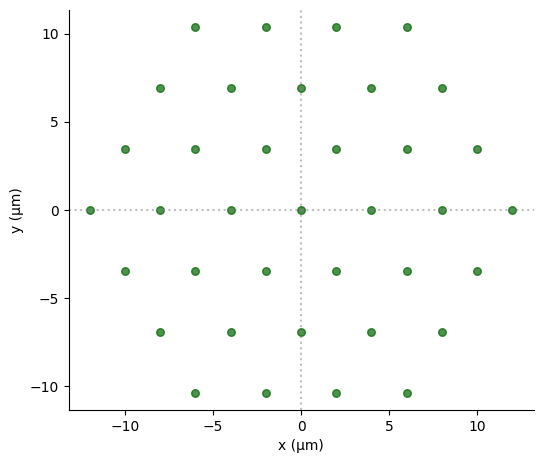

In [3]:
from pulser import Register
from pulser.devices import Chadoq2

layers = 3
reg = Register.hexagon(layers)
reg.draw(with_labels=False)



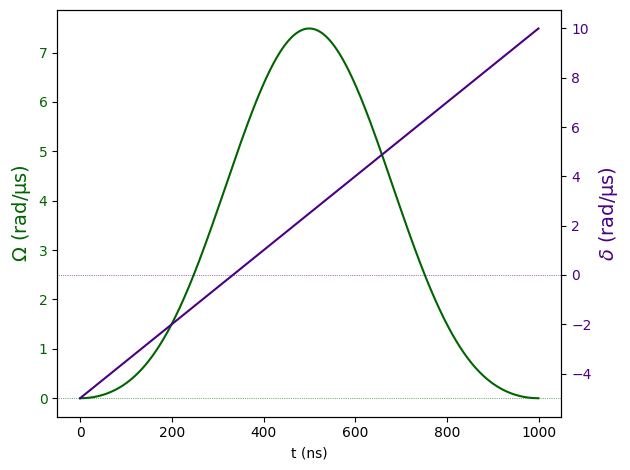

In [6]:
import numpy as np

from pulser import Pulse
from pulser.waveforms import RampWaveform, BlackmanWaveform

duration = 1000  # Typical: ~1 µsec
pulse = Pulse(
    BlackmanWaveform(duration, np.pi), RampWaveform(duration, -5.0, 10.0), 0
)
pulse.draw()

In [3]:
pulse

Pulse(amp=BlackmanWaveform(1000 ns, Area: 3.14), detuning=RampWaveform(1000 ns, -5->10 rad/µs), phase=0, post_phase_shift=0)

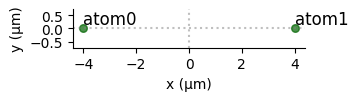

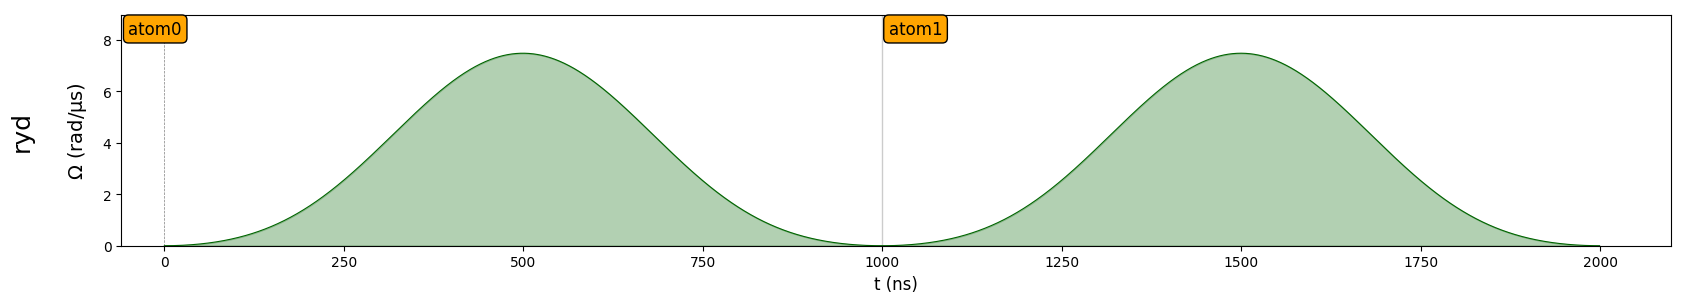

In [5]:
from pulser import Sequence

reg = Register.rectangle(1, 2, spacing=8, prefix="atom")
reg.draw()

pi_pulse = Pulse.ConstantDetuning(BlackmanWaveform(duration, np.pi), 0.0, 0.0)

seq = Sequence(reg, Chadoq2)

seq.declare_channel("ryd", "rydberg_local", "atom0")

seq.add(pi_pulse, "ryd")
seq.target("atom1", "ryd")
seq.add(pi_pulse, "ryd")

seq.draw()

In [5]:
pi_pulse

Pulse(amp=BlackmanWaveform(1000 ns, Area: 3.14), detuning=ConstantWaveform(1000 ns, 0 rad/µs), phase=0, post_phase_shift=0)

#### Simulation

In [2]:
import matplotlib.pyplot as plt
from pulser_simulation import Simulation

data = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>
rr = np.kron(r, r)  # |rr>
occup = [np.outer(rr, np.conj(rr))]  # |rr><rr|

for i, R in enumerate(distances):
    # Atom Register and Device
    reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

    # Pulse Sequence
    seq = Sequence(reg, Chadoq2)
    seq.declare_channel("ryd", "rydberg_local", "atom0")
    seq.add(pi_pulse, "ryd")
    seq.target("atom1", "ryd")
    seq.add(pi_pulse, "ryd")

    sim = Simulation(seq)

    res = sim.run()  # Returns a SimulationResults instance
    data.append(
        res.expect(occup)[0]
    )  # Get expectation value for the occupation operator
print("...Simulation Complete!")

NameError: name 'np' is not defined

In [31]:
sim.get_hamiltonian(100)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.71985293 0.         0.15088023 0.        ]
 [0.         0.         0.         0.15088023]
 [0.15088023 0.         0.         0.        ]
 [0.         0.15088023 0.         0.        ]]

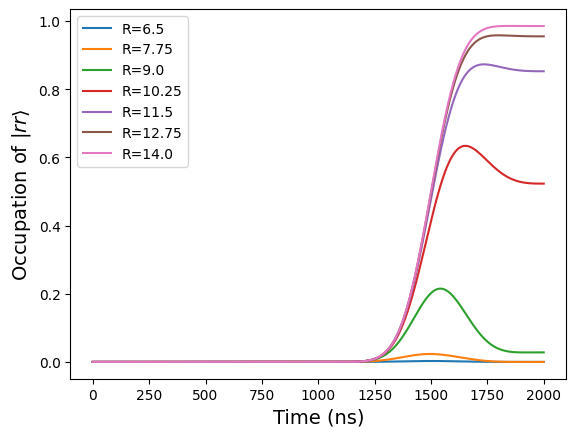

In [29]:
for i, R in enumerate(distances):
    plt.plot(data[i], label=f"R={R}")
    plt.xlabel("Time (ns)", fontsize=14)
    plt.ylabel(r"Occupation of $|rr\rangle$", fontsize=14)
    plt.legend()

### XY Spin chain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

import pulser
from pulser import Pulse, Sequence, Register
from pulser_simulation import Simulation
from pulser.devices import MockDevice
from pulser.waveforms import BlackmanWaveform

In [2]:
coords = np.array([[0, 0]])
qubits = dict(enumerate(coords))

reg = Register(qubits)
seq = Sequence(reg, MockDevice)
seq.declare_channel("MW", "mw_global")
# seq.declare_channel("ryd", "rydberg_local")


In [65]:
MockDevice.channels.keys()

dict_keys(['rydberg_global', 'rydberg_local', 'raman_global', 'raman_local', 'mw_global'])

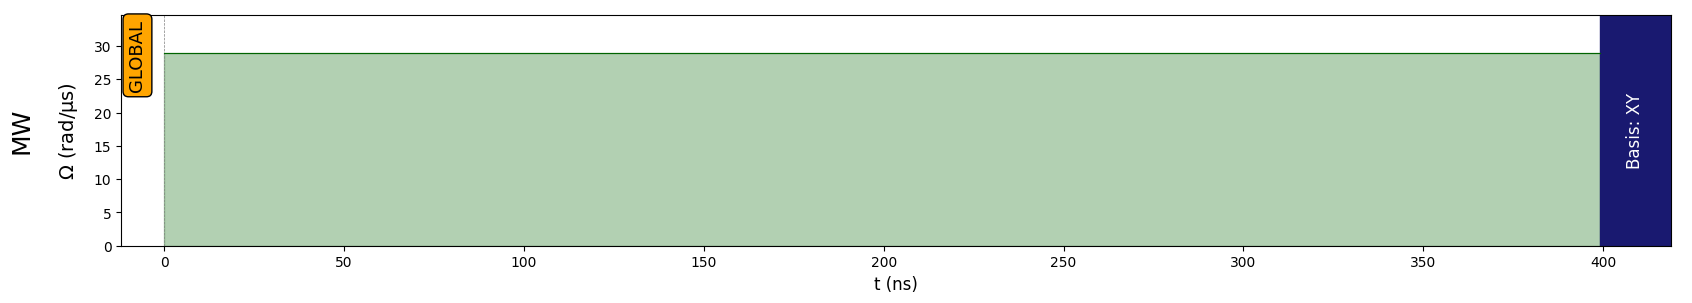

10.2%. Run time:   0.00s. Est. time left: 00:00:00:00
20.2%. Run time:   0.01s. Est. time left: 00:00:00:00
30.2%. Run time:   0.01s. Est. time left: 00:00:00:00
40.1%. Run time:   0.01s. Est. time left: 00:00:00:00
50.1%. Run time:   0.02s. Est. time left: 00:00:00:00
60.1%. Run time:   0.02s. Est. time left: 00:00:00:00
70.1%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.03s. Est. time left: 00:00:00:00
Total run time:   0.03s


In [3]:
simple_pulse = Pulse.ConstantPulse(400, 2 * np.pi * 4.6, 0, 0)
# 2pi * 4.6 MHz pulse (microwave)
seq.add(simple_pulse, "MW")
seq.measure(basis="XY")
seq.draw()
sim = Simulation(seq)

results = sim.run(progress_bar=True, nsteps=5000)



In [15]:
sim._eval_times_array

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [68]:
sim?

Type:           Simulation
String form:    <pulser_simulation.simulation.Simulation object at 0x7f3b88a137c0>
File:           ~/.local/share/virtualenvs/EuRyQa-E25LYCIN/lib/python3.10/site-packages/pulser_simulation/simulation.py
Docstring:     
Simulation of a pulse sequence using QuTiP.

Args:
    sequence: An instance of a Pulser Sequence that we
        want to simulate.
    sampling_rate: The fraction of samples that we wish to
        extract from the pulse sequence to simulate. Has to be a
        value between 0.05 and 1.0.
    config: Configuration to be used for this simulation.
    evaluation_times: Choose between:

        - "Full": The times are set to be the ones used to define the
          Hamiltonian to the solver.

        - "Minimal": The times are set to only include initial and final
          times.

        - An ArrayLike object of times in µs if you wish to only include
          those specific times.

        - A float to act as a sampling rate for the resultin

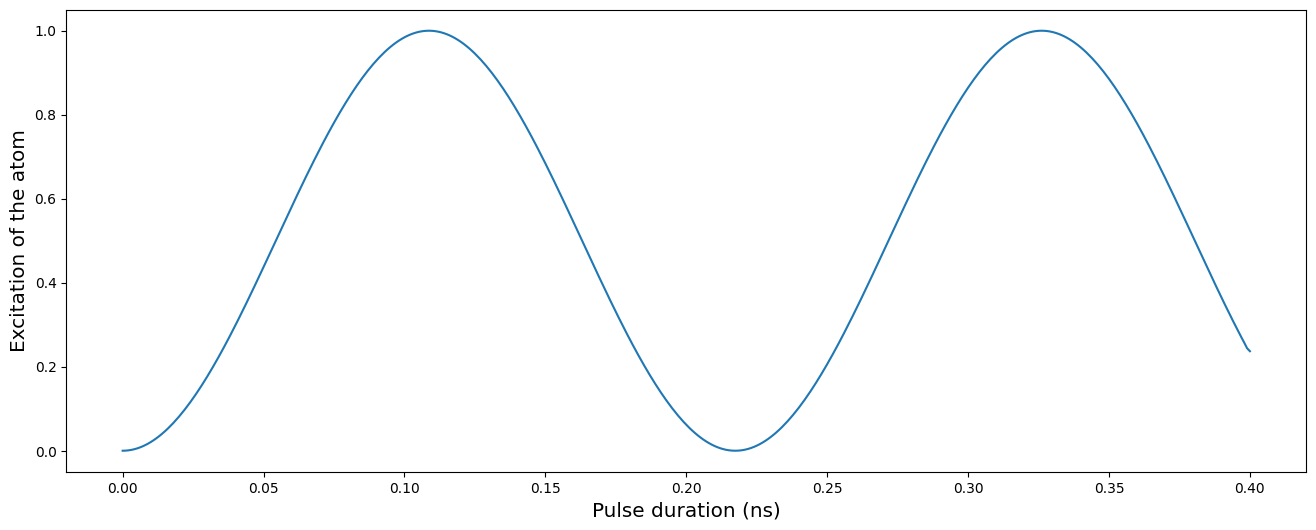

In [59]:
def magnetization(j, total_sites):
    prod = [qutip.qeye(2) for _ in range(total_sites)]
    prod[j] = (qutip.sigmaz() + qutip.qeye(2)) / 2
    return qutip.tensor(prod)


magn = magnetization(0, 1)
plt.figure(figsize=[16, 6])
results.plot(magn)
plt.xlabel("Pulse duration (ns)", fontsize="x-large")
plt.ylabel("Excitation of the atom", fontsize="x-large")
plt.show()



### C-Z Example

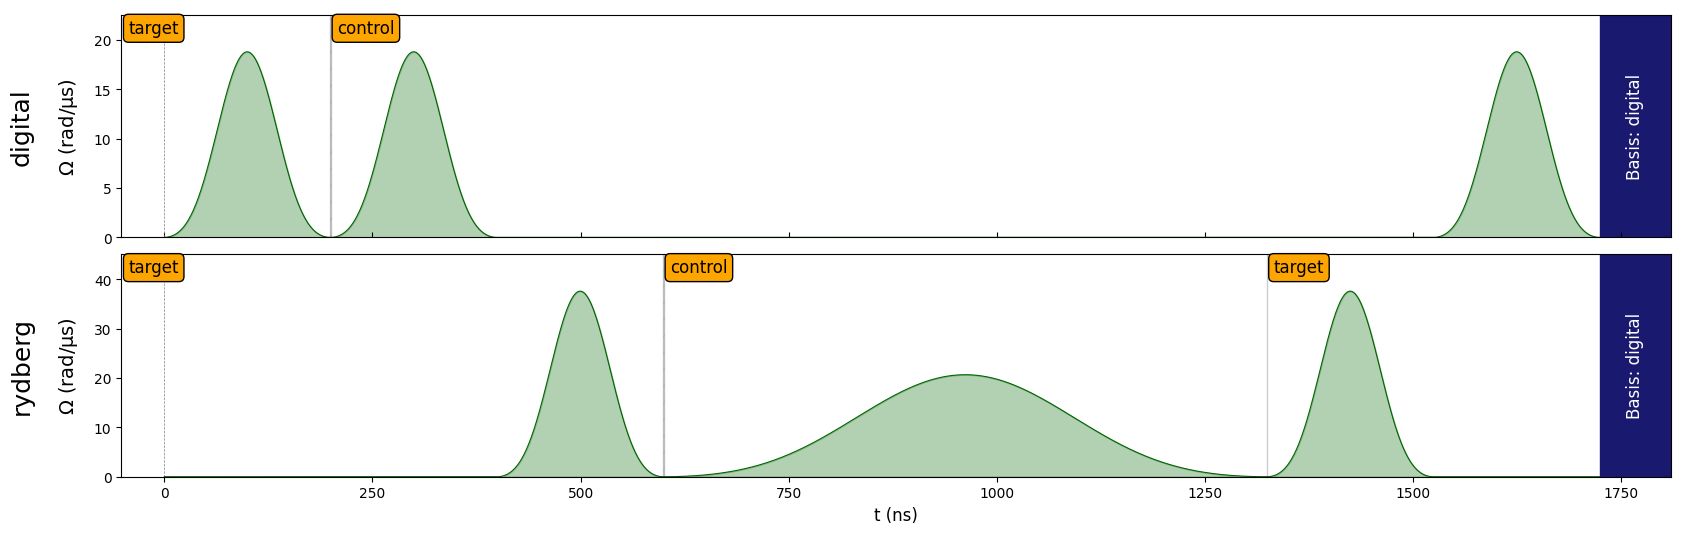

In [7]:
from pulser import Register, Sequence, Pulse
from pulser.devices import MockDevice
from pulser.waveforms import BlackmanWaveform

reg = Register({
  "target": (-2, 0),
  "control": (2, 0),
})

seq = Sequence(reg, MockDevice)
seq.declare_channel("digital", "raman_local")
seq.declare_channel("rydberg", "rydberg_local")

amp1 = BlackmanWaveform(200, 1.5707963267948966)
pulse1 = Pulse.ConstantDetuning(amp1, 0, 4.71238898038469)

amp2 = BlackmanWaveform(200, 1.5707963267948966)
pulse2 = Pulse.ConstantDetuning(amp2, 0, 1.5707963267948966)

amp3 = BlackmanWaveform(200, 3.141592653589793)
pulse3 = Pulse.ConstantDetuning(amp3, 0, 0)

amp4 = BlackmanWaveform(725, 6.283185307179586)
pulse4 = Pulse.ConstantDetuning(amp4, 0, 0)

amp5 = BlackmanWaveform(200, 3.141592653589793)
pulse5 = Pulse.ConstantDetuning(amp5, 0, 0)

amp6 = BlackmanWaveform(200, 1.5707963267948966)
pulse6 = Pulse.ConstantDetuning(amp6, 0, 4.71238898038469)

seq.target("target", "digital")
seq.add(pulse1, "digital")
seq.target("control", "digital")
seq.add(pulse2, "digital")
seq.target("target", "rydberg")
seq.align("digital", "rydberg")
seq.add(pulse3, "rydberg")
seq.target("control", "rydberg")
seq.add(pulse4, "rydberg")
seq.target("target", "rydberg")
seq.add(pulse5, "rydberg")
seq.align("rydberg", "digital")
seq.add(pulse6, "digital")
seq.measure("digital")

seq.draw()

sim = Simulation(seq)

res = sim.run()


In [16]:
np.all([ch in seq.declared_channels for ch in ('rydberg', 'digitald')])

False

In [17]:
a = []
a+= 2,3
a

[2, 3]

In [9]:
seq.declared_channels

{'digital': Raman.Local(Max Absolute Detuning: None, Max Amplitude: None, Minimum retarget time: 0 ns, Fixed retarget time: 0 ns, Clock period: 1 ns, Minimum pulse duration: 1 ns, Basis: 'digital'),
 'rydberg': Rydberg.Local(Max Absolute Detuning: None, Max Amplitude: None, Minimum retarget time: 0 ns, Fixed retarget time: 0 ns, Clock period: 1 ns, Minimum pulse duration: 1 ns, Basis: 'ground-rydberg')}

In [39]:
import qutip
qutip.basis(3,0)

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]]

In [40]:
sim.op_matrix

{'I': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]],
 'sigma_gr': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
 Qobj data =
 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 0. 0.]],
 'sigma_hg': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
 Qobj data =
 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 0.]],
 'sigma_rr': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
 Qobj data =
 [[1. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]],
 'sigma_gg': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
 Qobj data =
 [[0. 0. 0.]
  [0. 1. 0.]
  [0. 0. 0.]],
 'sigma_hh': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
 Qobj data =
 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]]}

### Simulating Asymmetric blockade

#### Microwave dressing

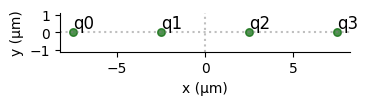

In [43]:
from pulser import Register
from pulser.devices import Chadoq2

qubits = 4
distance = 5

reg = Register.rectangle(1, qubits, spacing=distance, prefix="q")
reg.draw(with_labels=True)


# ------

## Computing coupling strengths $C_3$ and $C_6$ with ARC

In [1]:
import arc
import numpy as np
a = arc.Rubidium()
a?

Type:        Rubidium
String form: <arc.alkali_atom_data.Rubidium object at 0x7f829a47ad40>
File:        ~/.local/share/virtualenvs/EuRyQa-E25LYCIN/lib/python3.10/site-packages/arc/alkali_atom_data.py
Docstring:  
backward compatibility:
before there was only one Rubidium class, and that one corresponded
to Rubidium85

In [2]:
atom = arc.Rubidium()

# states (n, L, J)
state_s = (60,0,1/2, -1/2) 
state_p0 = (59, 1, 1/2, -1/2)
state_pp =  (60, 1, 1/2, 1/2) 

def PairState(state1: tuple, state2:tuple):
    calc = arc.PairStateInteractions(atom, *state1[:3], *state2[:3], state1[3], state2[3])
    calc.defineBasis(0 ,0 , 2, 2, 25e9, progressOutput=True)
    
    return calc

calc = PairState(state_s, state_s)



Calculating Hamiltonian matrix...


	matrix (dimension  125 )

Matrix R3 100.0 % (state 53 of 53)



                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.



Diagonalizing interaction matrix...

99% Now we are plotting...


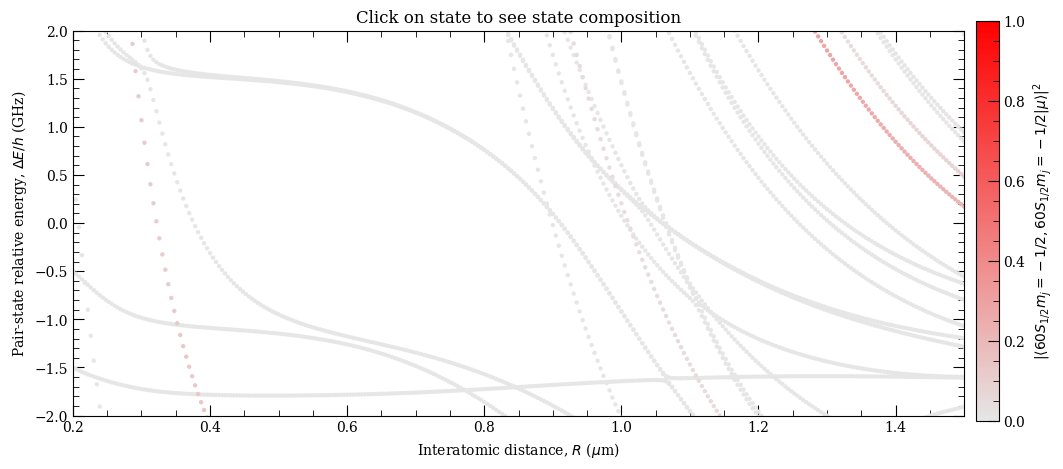

0

In [3]:
rvdw = 0.2
r=np.linspace(rvdw,1.5,300)
nEig=250 #Number of eigenstates to extract
calc.diagonalise(r,nEig,progressOutput=True)
#Plot
calc.plotLevelDiagram()
#Zoom-on on pair state
calc.ax.set_xlim(.2,1.5)
calc.ax.set_ylim(-2,2)
calc.showPlot() 

In [5]:
calc.getC6fromLevelDiagram(0.3*rvdw, 10*rvdw, showPlot=False)

c6 =  0.0005865093762722569  GHz /R^6 (mu m)^6
offset =  6.21291795929595


/home/raul/.local/share/virtualenvs/EuRyQa-E25LYCIN/lib/python3.10/site-packages/arc/calculations_atom_pairstate.py:2113: RuntimeWarning: invalid value encountered in log
  return np.log(c6 / r**6 + offset)


0.0005865093762722569